In [1]:
import networkx as nx

G:nx.DiGraph = nx.read_weighted_edgelist('/home/mugi/vscode/netprobstat/midterm/higgs-mention_network.edgelist', create_using=nx.DiGraph())

In [2]:
print("节点数:", G.number_of_nodes())
print("边数:", G.number_of_edges())
print("平均出度:", sum(dict(G.out_degree()).values()) / G.number_of_nodes())

节点数: 116408
边数: 150818
平均出度: 1.2955982406707443


Text(0.5, 1.0, 'Higgs Mention Network')

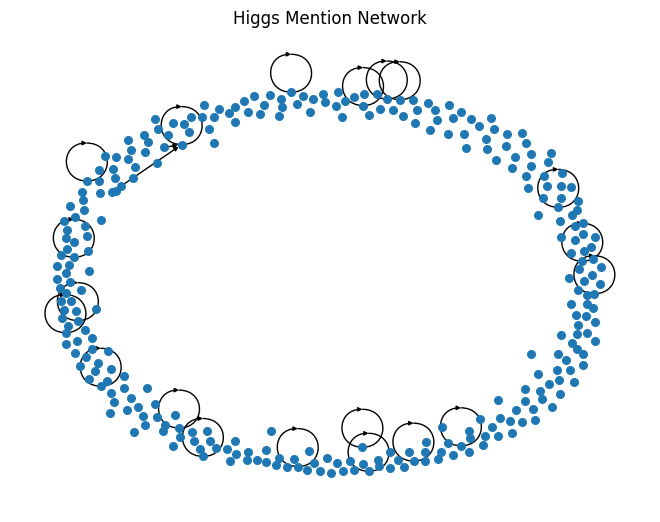

In [ ]:
import matplotlib.pyplot as plt
import random

random.seed(7)
sub_nodes = random.sample(list(G.nodes), 300)
H = G.subgraph(sub_nodes)
pos = nx.spring_layout(H, k=0.3)
nx.draw(H, pos, node_size=30, arrowsize=6, with_labels=False)
plt.title("Higgs Mention Network")



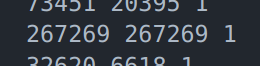

In [ ]:
import numpy as np

n_nodes = G.number_of_nodes()
n_edges = G.number_of_edges()

out_deg = [d for n, d in G.out_degree()]
in_deg  = [d for n, d in G.in_degree()]

avg_outdeg = np.mean(out_deg)
avg_indeg = np.mean(in_deg)

density = nx.density(G)

C = nx.average_clustering(G.to_undirected())

largest_cc = max(nx.strongly_connected_components(G), key=len)
H_sub = G.subgraph(largest_cc)
avg_path_len = nx.average_shortest_path_length(H_sub)

print(f"节点数: {n_nodes}")
print(f"边数: {n_edges}")
print(f"平均出度: {avg_outdeg:.2f}")
print(f"平均入度: {avg_indeg:.2f}")
print(f"网络密度: {density:.6f}")
print(f"聚类系数: {C:.4f}")
print(f"平均最短路径长度: {avg_path_len:.2f}")


节点数: 116408
边数: 150818
平均出度: 1.30
平均入度: 1.30
网络密度: 0.000011
聚类系数: 0.0825
平均最短路径长度: 7.16


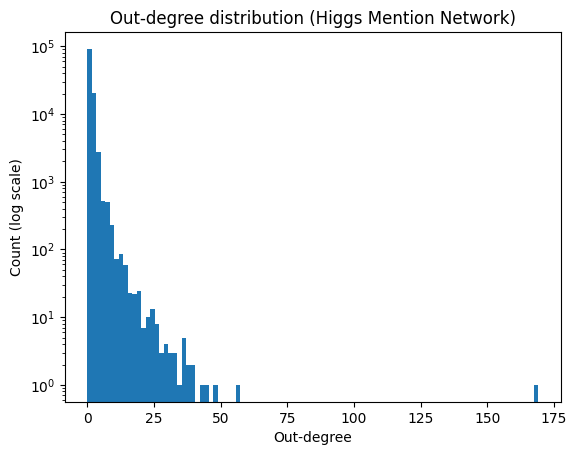

In [5]:
plt.figure()
plt.hist(out_deg, bins=100, log=True)
plt.xlabel("Out-degree")
plt.ylabel("Count (log scale)")
plt.title("Out-degree distribution (Higgs Mention Network)")
plt.show()